## 🔵 Can we predict credit card fraud




###### By Megin van Herk

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('matplotlib version:', matplotlib.__version__)
#setting plot style
plt.style.use('seaborn-darkgrid')
%matplotlib inline

numpy version: 1.20.3
pandas version: 1.3.4
scikit-learn version: 0.24.2
matplotlib version: 3.4.3


## 🔵 Index


🔷Domain understanding

🔹Data sourcing

🔹Analytic approach

🔷 Provisioning

🔹Data requirements

🔹Data collection

🔹Data understanding

🔹Data preperation

🔷 Predictions

🔹Preprocessing

🔹Modelling

🔹Evaluation

-------------------

# 🔷Domain understanding

The main part for domain understanding can be found in the project proposal document.



### 🔹Data sourcing

For inital EDA I did some exploring of some possible datasets I found:

#### Credit card fraud dataset

This dataset contains only numeric data. It has very little cases of actual credit card fraud, it is very imbalanced. Most of the data is anonymous. It has the column “class” which 0 means no fraud and 1 means fraud. 
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


In [2]:
df = pd.read_csv("Data/creditcard.csv") #read the csv file
df.head(5) #display top 5 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

There is very little amount of data for actual frauds. we will have to perform some sort of scaling to improve this.

#### Fraud detection dataset

This dataset contains more Categorical data Including peoples names ages and genders etc.This data consists of 2 different csv files that are “test” and “train” 
https://www.kaggle.com/datasets/kartik2112/fraud-detection


In [4]:
fraud = pd.read_csv("Data/fraudtest.csv") #read the csv file
fraud.head(5) # display the top 5 rows

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
fraud.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

This data set has allot more catergorical data, including a time stamp, which could be used for time series algorithm. It also gives us longtitude and latidude, so we can plot some geographic data. This is probably so that we can compare the transactions lontitude latiude with the merch long and latidude, to see if the difference ein geolocation leads to fraud.

- merch_lat -> lattitude of the merchant
- merch_long -> longitude of merchant
- lat -> transaction lattitude
- long -> transaction longitude

It also gives us DOB, so we can compare if the age of card holders has any correlation with fraud or not.

- dob -> date of birth of card holder

In [6]:
fraud.is_fraud.value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

This data also has very little amount of data for actual frauds. This can affect the prediction outcome. we will have to perform some sort of scaling to improve this.

### I will use both datasets and see which one will get the better result in the end


I think comparing numerical data and catergorical datasets can be interesting to see which one yields a better result.

### 🔹Analytic approach

In an analytic approach we decide the target variable, we find the nature of the problem and we find good indicators. This will also be in the jupyter notebook with plots.

Our target variable will be “is it credit card fraud or not?” 
This shows in dataset 1 as “class”= “1”or ”0”. In dataset 2 it is shown as “is_fraud”=”1”or ”0”.
1 meaning, yes there is credit card fraud.
0 meaning, no there is no credit card fraud.
Having a binary target variable will make certain predictions easier. and more accurate.


 Our problem is definitely “is this A or B” so a classification algorithm could be applied here. since our main research problem is “Is this credit card fraud or not?”
Other possible algorithms that could be used is the regression algorithm, we could rephrase the question and ask “how many credit card frauds were there/are there going to be?”. This would also then fit the regression algorithm.


##### Good indicators

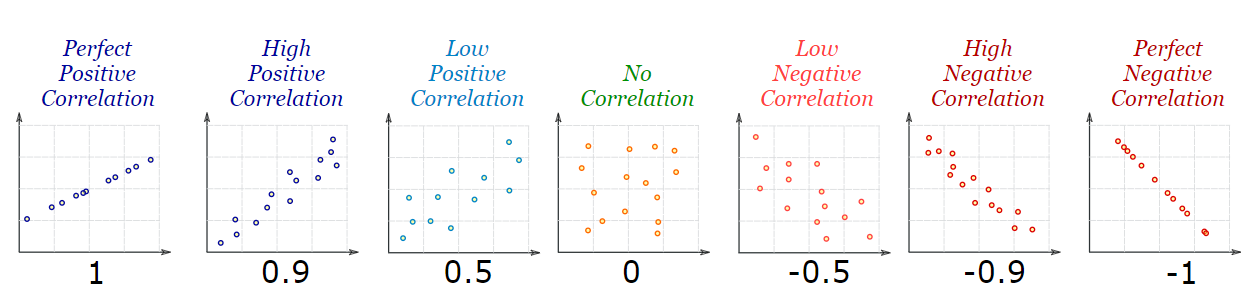

We shall compare the different columns for both datasets and see which columns correlate with another. 

In [ ]:
sns.pairplot(df, hue="Class")

In [ ]:
sns.pairplot(fraud, hue="is_fraud")

# 🔷 Provisioning

🔹Data requirements


🔹Data collection

🔹Data understanding

🔹Data preperation


# 🔷 Predictions

🔹Preprocessing

🔹Modelling

🔹Evaluation